<a href="https://colab.research.google.com/github/Hardik-Sankhla/P2P-Lending-Risk-Assessment-using-Logistic-Regression/blob/main/P2P_Lending_Risk_Assessment_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P2P Lending Risk Assessment Report:

              precision    recall  f1-score   support

           0       0.49      0.89      0.63        96
           1       0.59      0.15      0.24       104

    accuracy                           0.51       200
   macro avg       0.54      0.52      0.44       200
weighted avg       0.54      0.51      0.43       200



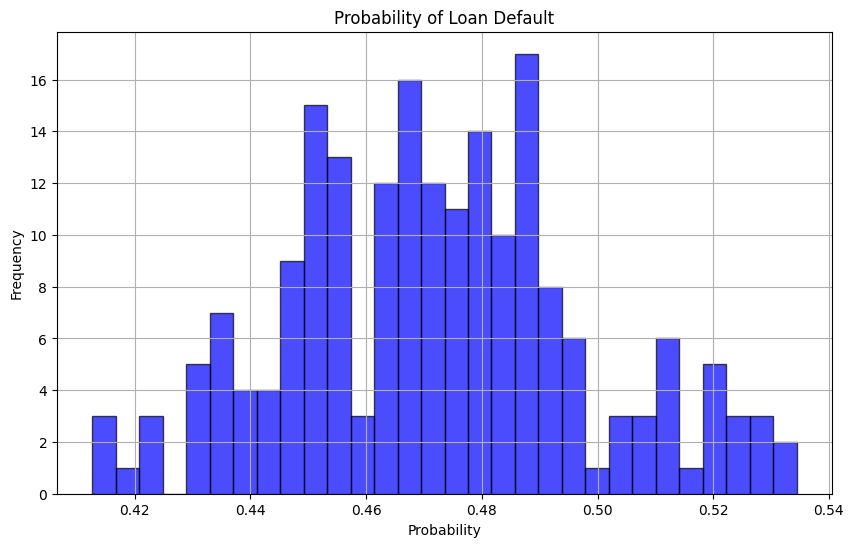

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
from google.colab import files
import os

# 1. Simulate P2P lending data (e.g., borrower financial profile, loan information)
np.random.seed(42)
data = {
    'credit_score': np.random.randint(600, 850, 1000),  # Credit score (600-850)
    'loan_amount': np.random.randint(1000, 50000, 1000),  # Loan amount in USD
    'loan_term': np.random.choice([12, 24, 36, 48, 60], 1000),  # Loan term in months
    'annual_income': np.random.randint(20000, 100000, 1000),  # Borrower's annual income
    'default': np.random.choice([0, 1], 1000)  # 0 = No default, 1 = Default
}

df = pd.DataFrame(data)

# 2. Define features and target variable
X = df[['credit_score', 'loan_amount', 'loan_term', 'annual_income']]
y = df['default']

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate the model
print("P2P Lending Risk Assessment Report:\n")
print(classification_report(y_test, y_pred))

# 8. Visualize the predicted default probability (e.g., using probability scores)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of default (class 1)
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Probability of Loan Default")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Ensure the 'model/' directory exists
os.makedirs('model', exist_ok=True)

# Save the model and scaler to disk
joblib.dump(model, "model/logistic_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")

# Download the saved model and scaler
files.download("model/logistic_model.pkl")
files.download("model/scaler.pkl")
